In [1]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import numpy as np
import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

In [2]:
with open('../pre_processed_data/concat_10_data_plus_vam.pkl', 'rb') as f:
    data = pickle.load(f)  # 1042326
    label = pickle.load(f)  # 1042326

`data` 是一个 `list`，每一项的形式如下所示
'新品 口碑 产品 护肤 效果 附件 日本 贵妇 品牌 肌肤 之匙 时候 附件 肌肤 黄金 闺蜜 价格 太值 质地 有点 附件 樱桃 样子'

In [3]:
print(len(data))
print(len(label))

1042326
1042326


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, label, random_state=42, test_size=0.7)

In [5]:
print(len(x_train))
print(len(x_test))

312697
729629


In [6]:
# 词袋模型训练词向量
bow = CountVectorizer()
x_train = bow.fit_transform(x_train)  # csr_matrix (312697, 616910)
x_test = bow.transform(x_test)  # csr_matrix (729629, 616910)

In [7]:
print(x_train.shape)
print(x_test.shape)

(312697, 616910)
(729629, 616910)


In [8]:
# 采用交叉验证对朴素贝叶斯进行调参
train_starttime = datetime.datetime.now()
parameters = {'fit_prior': [True, False], 'alpha': np.logspace(-5, 1, num=10, base=2)}
grid_search = GridSearchCV(MultinomialNB(), parameters)
grid_search.fit(x_train, y_train)
train_endtime = datetime.datetime.now()

/home/solejay/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [9]:
test_starttime = datetime.datetime.now()
y_pred = grid_search.predict(x_test)
test_endtime = datetime.datetime.now()

In [10]:
train_time = train_endtime - train_starttime
test_time = test_endtime - test_starttime

In [11]:
print(train_time)
print(test_time)

0:02:03.763955
0:00:03.053667


In [12]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, savename=None, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.savefig('../result/%s.png' % savename)
    plt.show()

In [13]:
labels = ['culture', 'medical', 'automobile', 'dressing', 'entertainment', 'finance', 'life', 'military', 'social',
          'sports']

In [14]:
y_true = y_test

Normalized confusion matrix
[[9.34148700e-01 3.99057516e-03 7.35464364e-04 3.86799777e-03
  1.70927366e-02 1.39465835e-02 1.36197104e-05 3.32320935e-03
  1.72016943e-02 5.67941926e-03]
 [2.88113863e-05 8.78646441e-01 7.20284656e-05 5.10969935e-02
  9.93992826e-04 3.94715992e-02 2.73708169e-04 2.16229454e-02
  4.36492502e-03 3.42855496e-03]
 [2.65020009e-05 2.50443909e-03 9.63626004e-01 1.20981634e-02
  1.06008004e-04 2.05390507e-02 5.96295020e-04 3.04773010e-04
  7.95060027e-05 1.19259004e-04]
 [2.63272006e-04 3.62541039e-02 6.96896488e-04 9.38301431e-01
  1.23892709e-03 1.36591712e-02 0.00000000e+00 4.18137893e-03
  1.13052097e-03 4.27429846e-03]
 [1.39553707e-05 0.00000000e+00 1.39553707e-05 0.00000000e+00
  9.95590103e-01 0.00000000e+00 1.95375190e-04 0.00000000e+00
  4.18661122e-03 0.00000000e+00]
 [1.54819422e-03 5.11838347e-02 2.15412540e-02 4.47641673e-02
  1.88185677e-03 7.96706083e-01 2.59455997e-02 6.99356699e-03
  4.54982249e-02 3.93721806e-03]
 [0.00000000e+00 9.81244218e-0

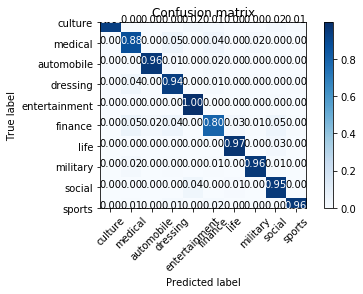

In [23]:
# 打印混淆矩阵
matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(matrix, classes=labels)

左上角为0.94

In [24]:
print(classification_report(y_true, y_pred, target_names=labels))

               precision    recall  f1-score   support

      culture       1.00      0.93      0.96     73423
      medical       0.87      0.88      0.87     69417
   automobile       0.98      0.96      0.97     75466
     dressing       0.86      0.94      0.90     64572
entertainment       0.94      1.00      0.97     71657
      finance       0.88      0.80      0.84     74926
         life       0.96      0.97      0.97     71338
     military       0.97      0.96      0.96     86295
       social       0.90      0.95      0.93     75640
       sports       0.98      0.96      0.97     66895

     accuracy                           0.94    729629
    macro avg       0.93      0.94      0.93    729629
 weighted avg       0.94      0.94      0.93    729629

